**In case of problems or questions, please first check the list of [Frequently Asked Questions (FAQ)](https://stardist.net/docs/faq.html).**

In [2]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib
# matplotlib.rcParams["image.interpolation"] = None
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from glob import glob
from tqdm import tqdm
from tifffile import imread
from csbdeep.utils import Path, download_and_extract_zip_file

from stardist import fill_label_holes, relabel_image_stardist, random_label_cmap
from stardist.matching import matching_dataset

np.random.seed(42)
lbl_cmap = random_label_cmap()

# Data

This notebook demonstrates how the training data for *StarDist* should look like and whether the annotated objects can be appropriately described by star-convex polygons. 

<div class="alert alert-block alert-info">
The training data that needs to be provided for StarDist consists of corresponding pairs of raw images and pixelwise annotated ground truth images (masks), where every pixel has a unique integer value indicating the object id (or 0 for background). 
</div>

For this demo we will download the file `dsb2018.zip` that contains the respective train and test images with associated ground truth labels as used in [our paper](https://arxiv.org/abs/1806.03535).
They are a subset of the `stage1_train` images from the Kaggle 2018 Data Science Bowl, which are [available in full](https://data.broadinstitute.org/bbbc/BBBC038/) from the [Broad Bioimage Benchmark Collection](https://data.broadinstitute.org/bbbc/).

In [3]:
X = sorted(glob('/mnt/external.data/TowbinLab/spsalmon/nuclei_segmentation_stardist_training/database_50/ch2_WBT281_frames/*.tiff'))
Y = sorted(glob('/mnt/external.data/TowbinLab/spsalmon/nuclei_segmentation_stardist_training/database_50/labels/*.tiff'))
assert all(Path(x).name==Path(y).name for x,y in zip(X,Y))

Load only a small subset

In [4]:
X, Y = X[:10], Y[:10]

print(X)

['/mnt/external.data/TowbinLab/spsalmon/nuclei_segmentation_stardist_training/database_50/ch2_WBT281_frames/Time00103_Point0017_Channel470 nm,470 nm_Seq7062_5.tiff', '/mnt/external.data/TowbinLab/spsalmon/nuclei_segmentation_stardist_training/database_50/ch2_WBT281_frames/Time00110_Point0000_Channel470 nm,470 nm_Seq7504_9.tiff', '/mnt/external.data/TowbinLab/spsalmon/nuclei_segmentation_stardist_training/database_50/ch2_WBT281_frames/Time00114_Point0009_Channel470 nm,470 nm_Seq7794_16.tiff', '/mnt/external.data/TowbinLab/spsalmon/nuclei_segmentation_stardist_training/database_50/ch2_WBT281_frames/Time00116_Point0005_Channel470 nm,470 nm_Seq7922_6.tiff', '/mnt/external.data/TowbinLab/spsalmon/nuclei_segmentation_stardist_training/database_50/ch2_WBT281_frames/Time00116_Point0005_Channel470 nm,470 nm_Seq7922_8.tiff', '/mnt/external.data/TowbinLab/spsalmon/nuclei_segmentation_stardist_training/database_50/ch2_WBT281_frames/Time00121_Point0016_Channel470 nm,470 nm_Seq8284_11.tiff', '/mnt/e

In [5]:
X = list(map(imread,X))
Y = list(map(imread,Y))

# Example image

In [6]:
i = min(8, len(X)-1)
img, lbl = X[i], fill_label_holes(Y[i])
assert img.ndim in (2,3)
img = img if img.ndim==2 else img[...,:3]
# assumed axes ordering of img and lbl is: YX(C)

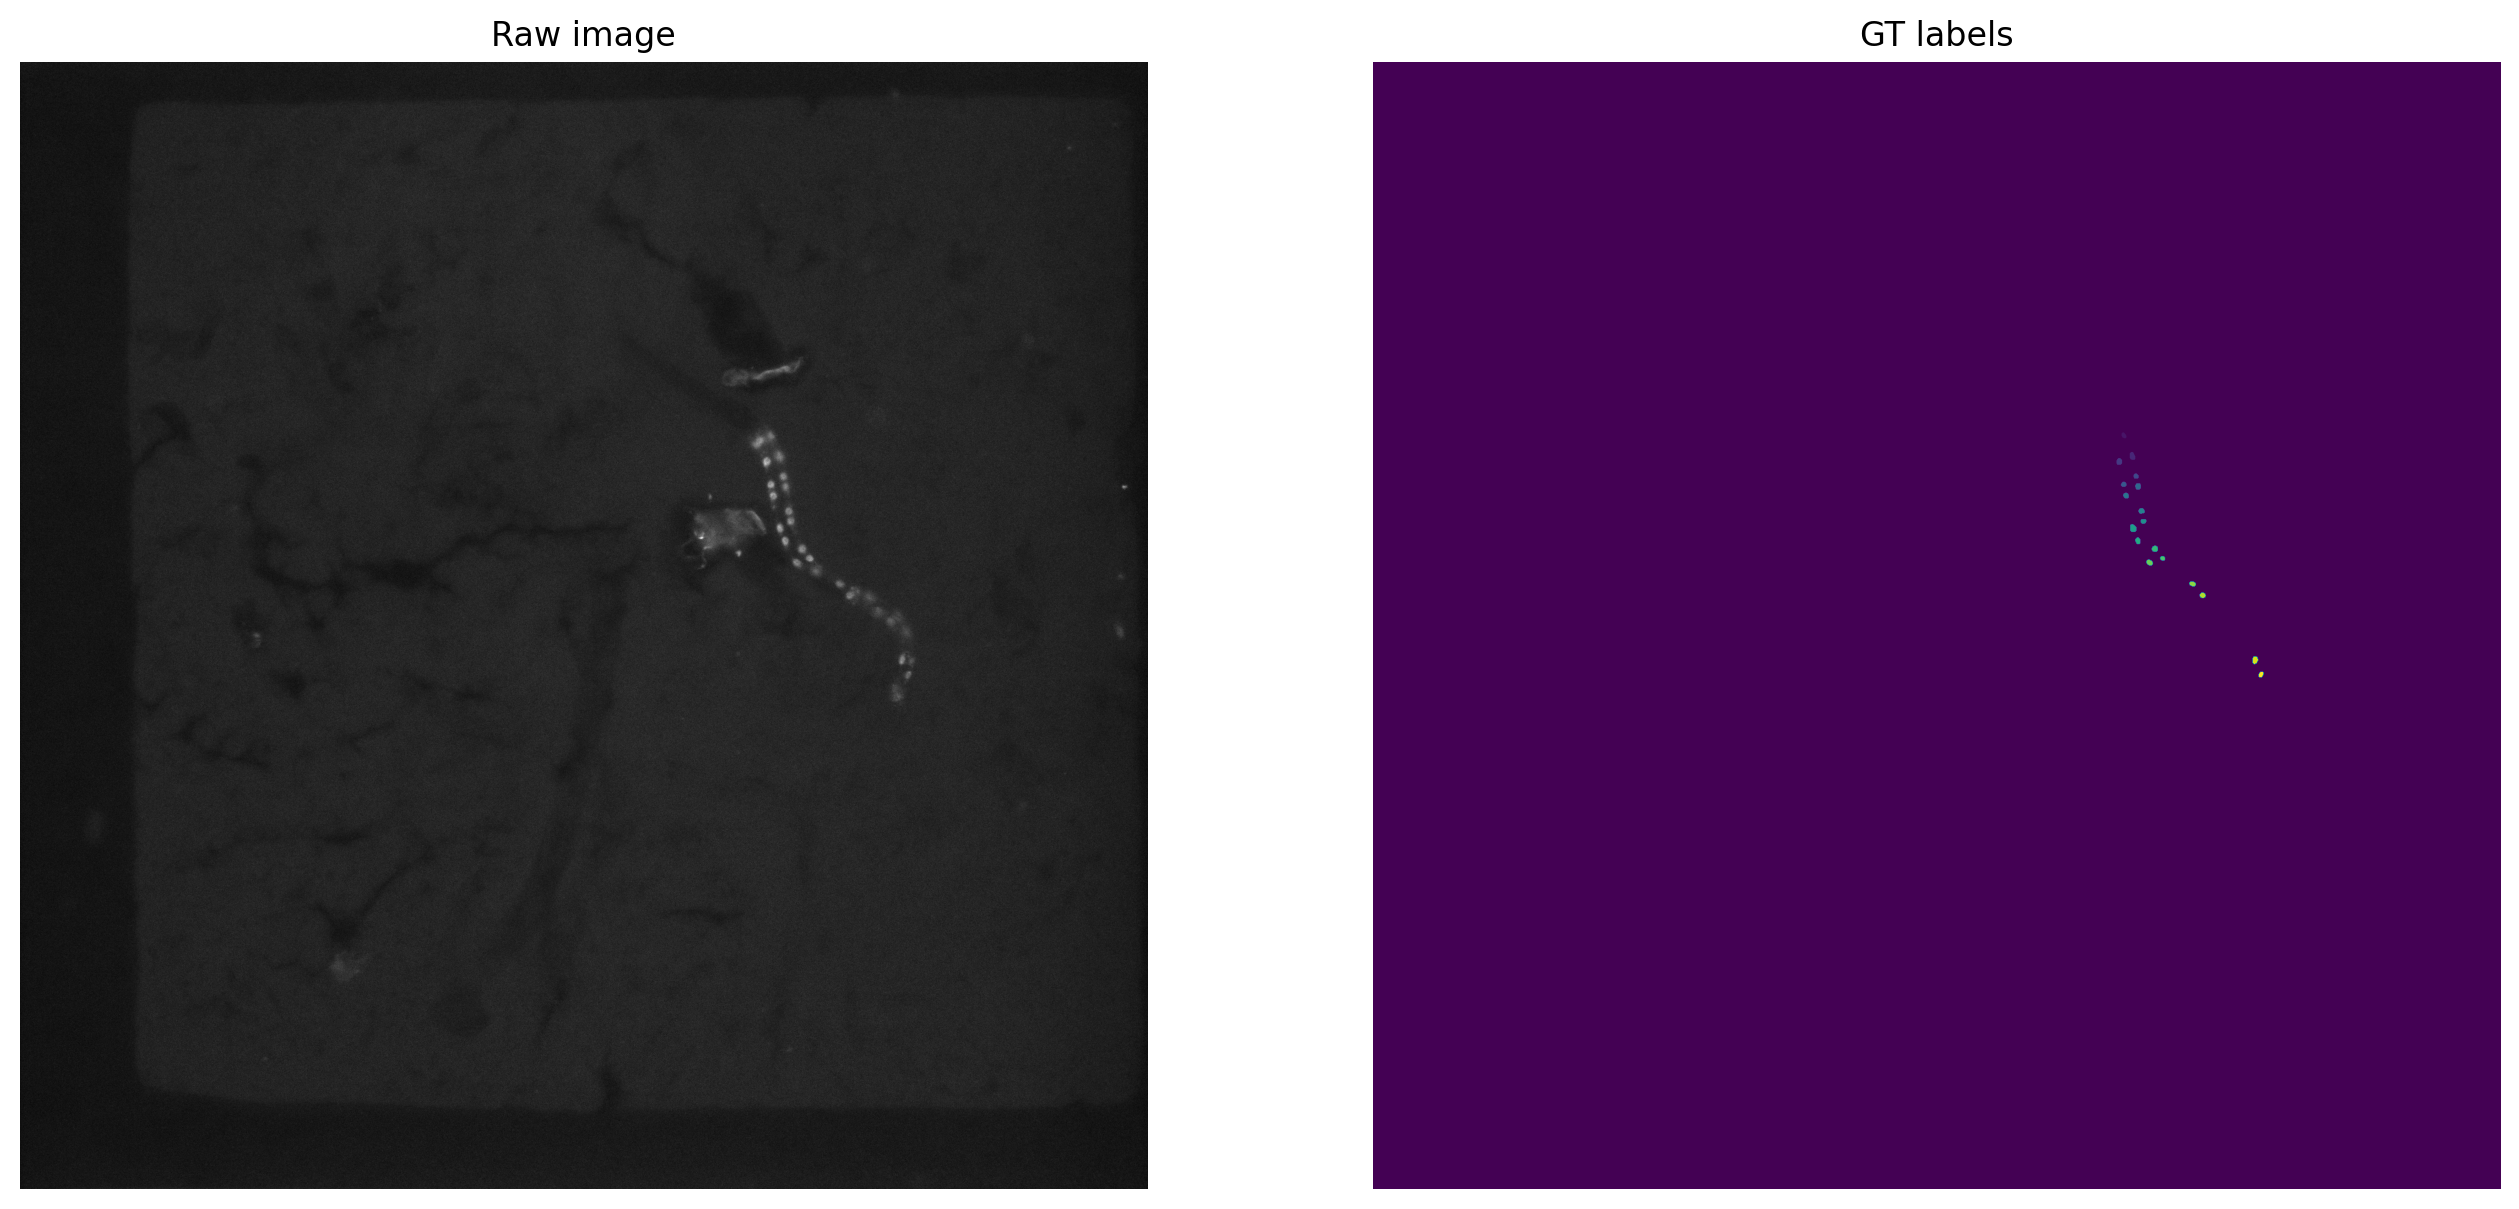

In [7]:
plt.figure(figsize=(16,10))
plt.subplot(121); plt.imshow(img,cmap='gray');   plt.axis('off'); plt.title('Raw image')
plt.subplot(122); plt.imshow(lbl); plt.axis('off'); plt.title('GT labels')
None;

# Fitting ground-truth labels with star-convex polygons

In [18]:
labels = [lbl]
n_rays = [2**i for i in range(2,8)]
scores = []
for r in tqdm(n_rays):
    Y_reconstructed = [relabel_image_stardist(lbl, n_rays=r) for lbl in labels]
    mean_iou = matching_dataset(labels, Y_reconstructed, thresh=0, show_progress=False).mean_true_score
    print(Y_reconstructed)
    scores.append(mean_iou)

 17%|█▋        | 1/6 [00:04<00:22,  4.41s/it]

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)]


 33%|███▎      | 2/6 [00:04<00:08,  2.03s/it]

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)]


 50%|█████     | 3/6 [00:05<00:03,  1.24s/it]

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)]


 67%|██████▋   | 4/6 [00:05<00:01,  1.13it/s]

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)]


 83%|████████▎ | 5/6 [00:05<00:00,  1.46it/s]

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)]


100%|██████████| 6/6 [00:06<00:00,  1.03s/it]

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)]


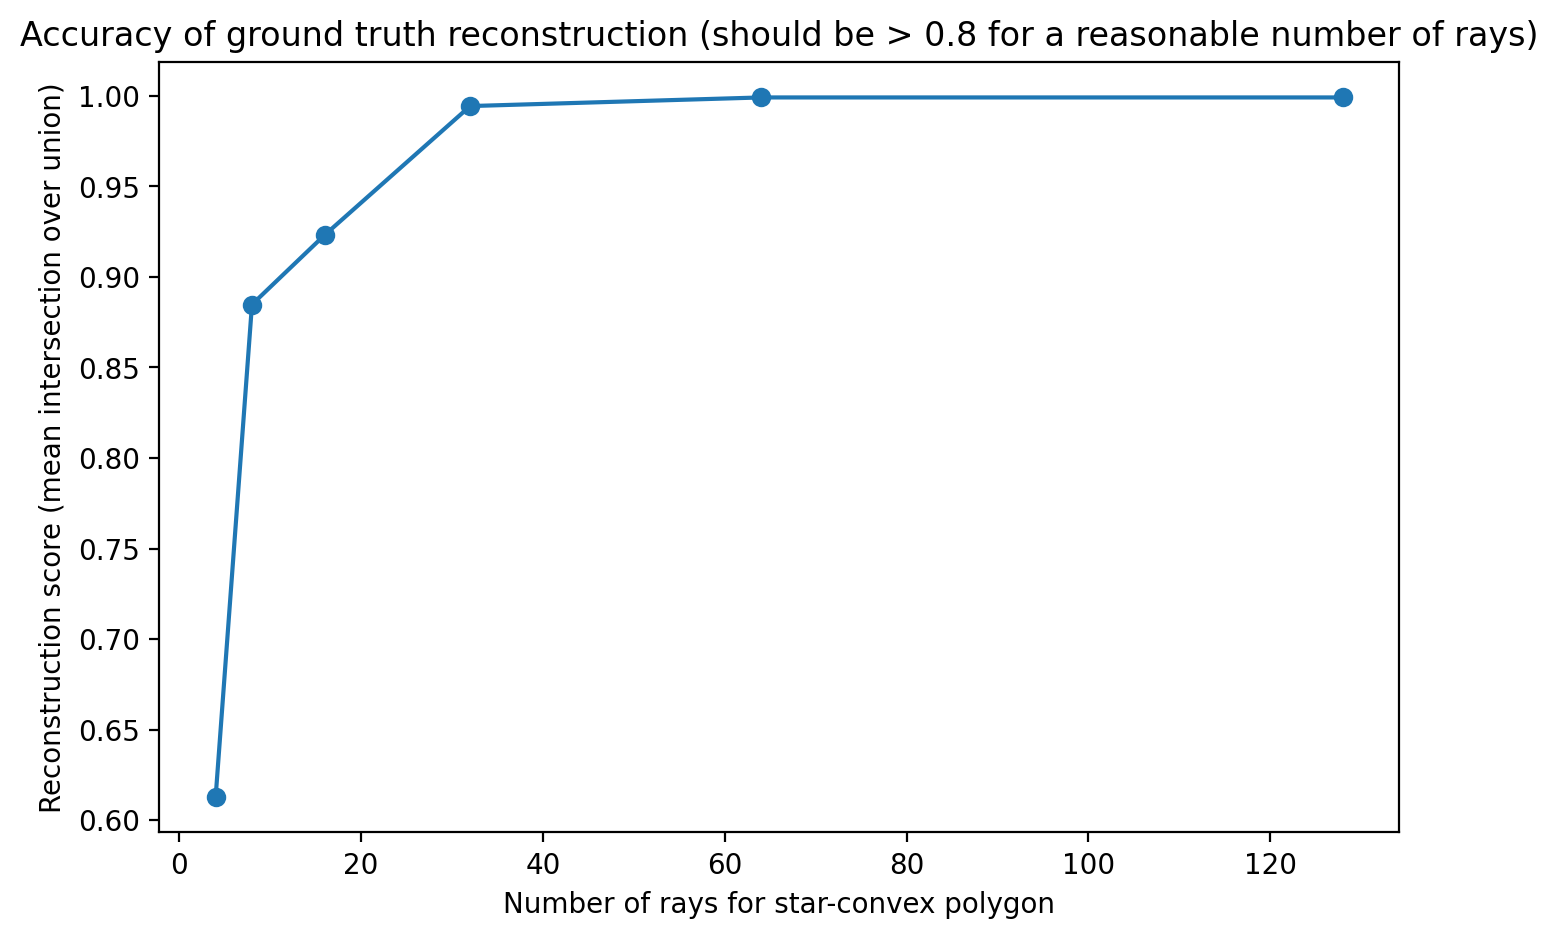

In [19]:
plt.figure(figsize=(8,5))
plt.plot(n_rays, scores, 'o-')
plt.xlabel('Number of rays for star-convex polygon')
plt.ylabel('Reconstruction score (mean intersection over union)')
plt.title("Accuracy of ground truth reconstruction (should be > 0.8 for a reasonable number of rays)")
None;

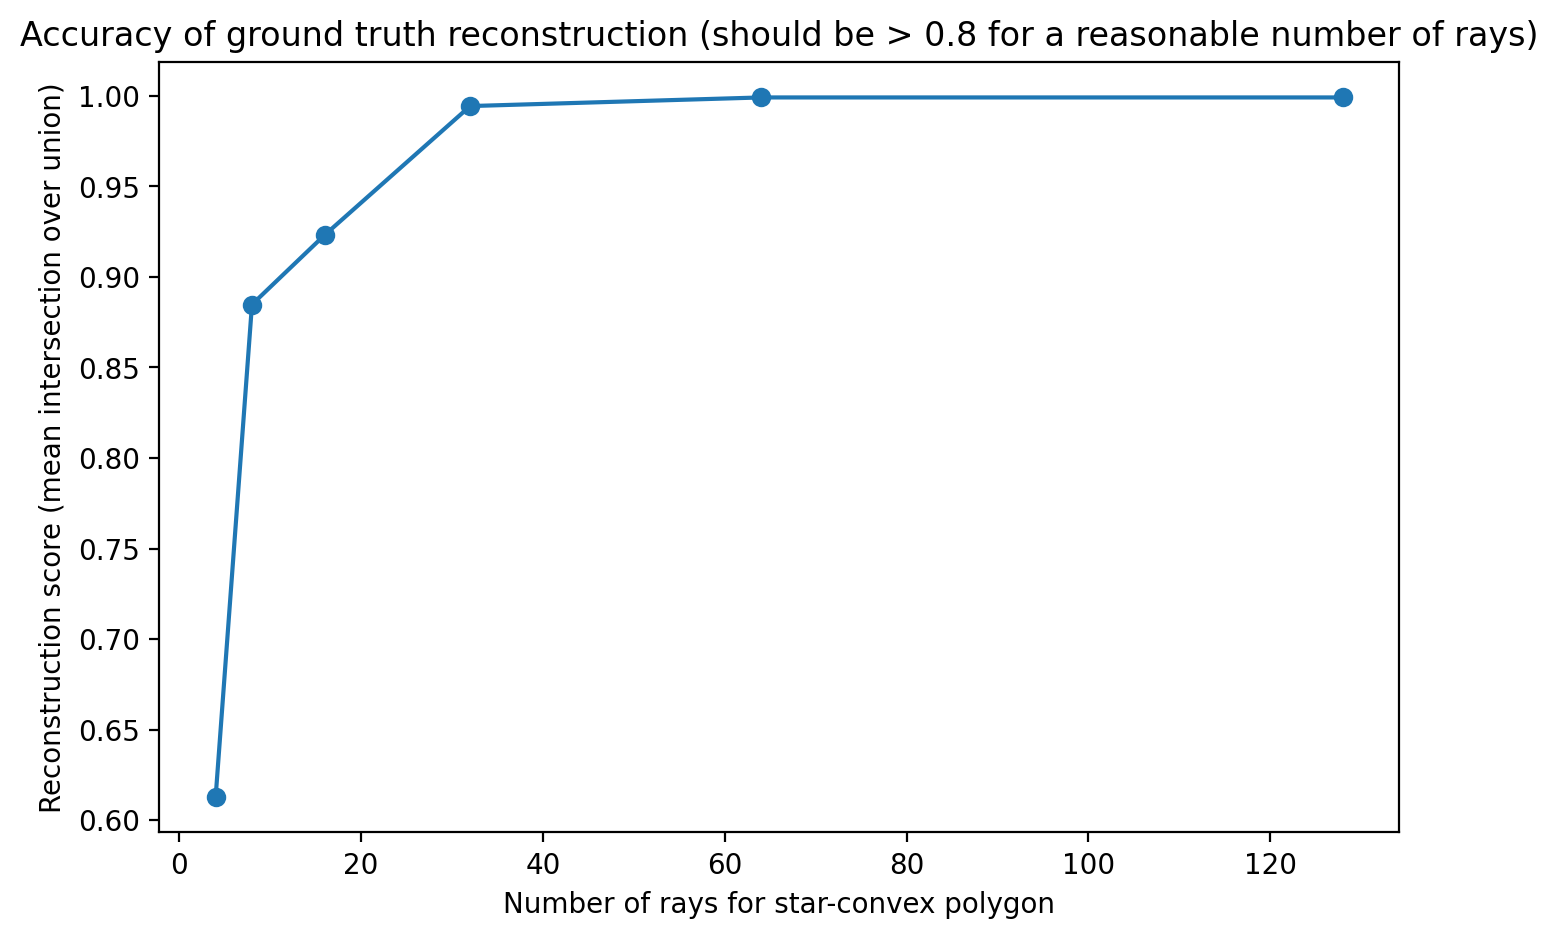

In [20]:
plt.figure(figsize=(8,5))
plt.plot(n_rays, scores, 'o-')
plt.xlabel('Number of rays for star-convex polygon')
plt.ylabel('Reconstruction score (mean intersection over union)')
plt.title("Accuracy of ground truth reconstruction (should be > 0.8 for a reasonable number of rays)")
None;

## Example image reconstructed with various number of rays

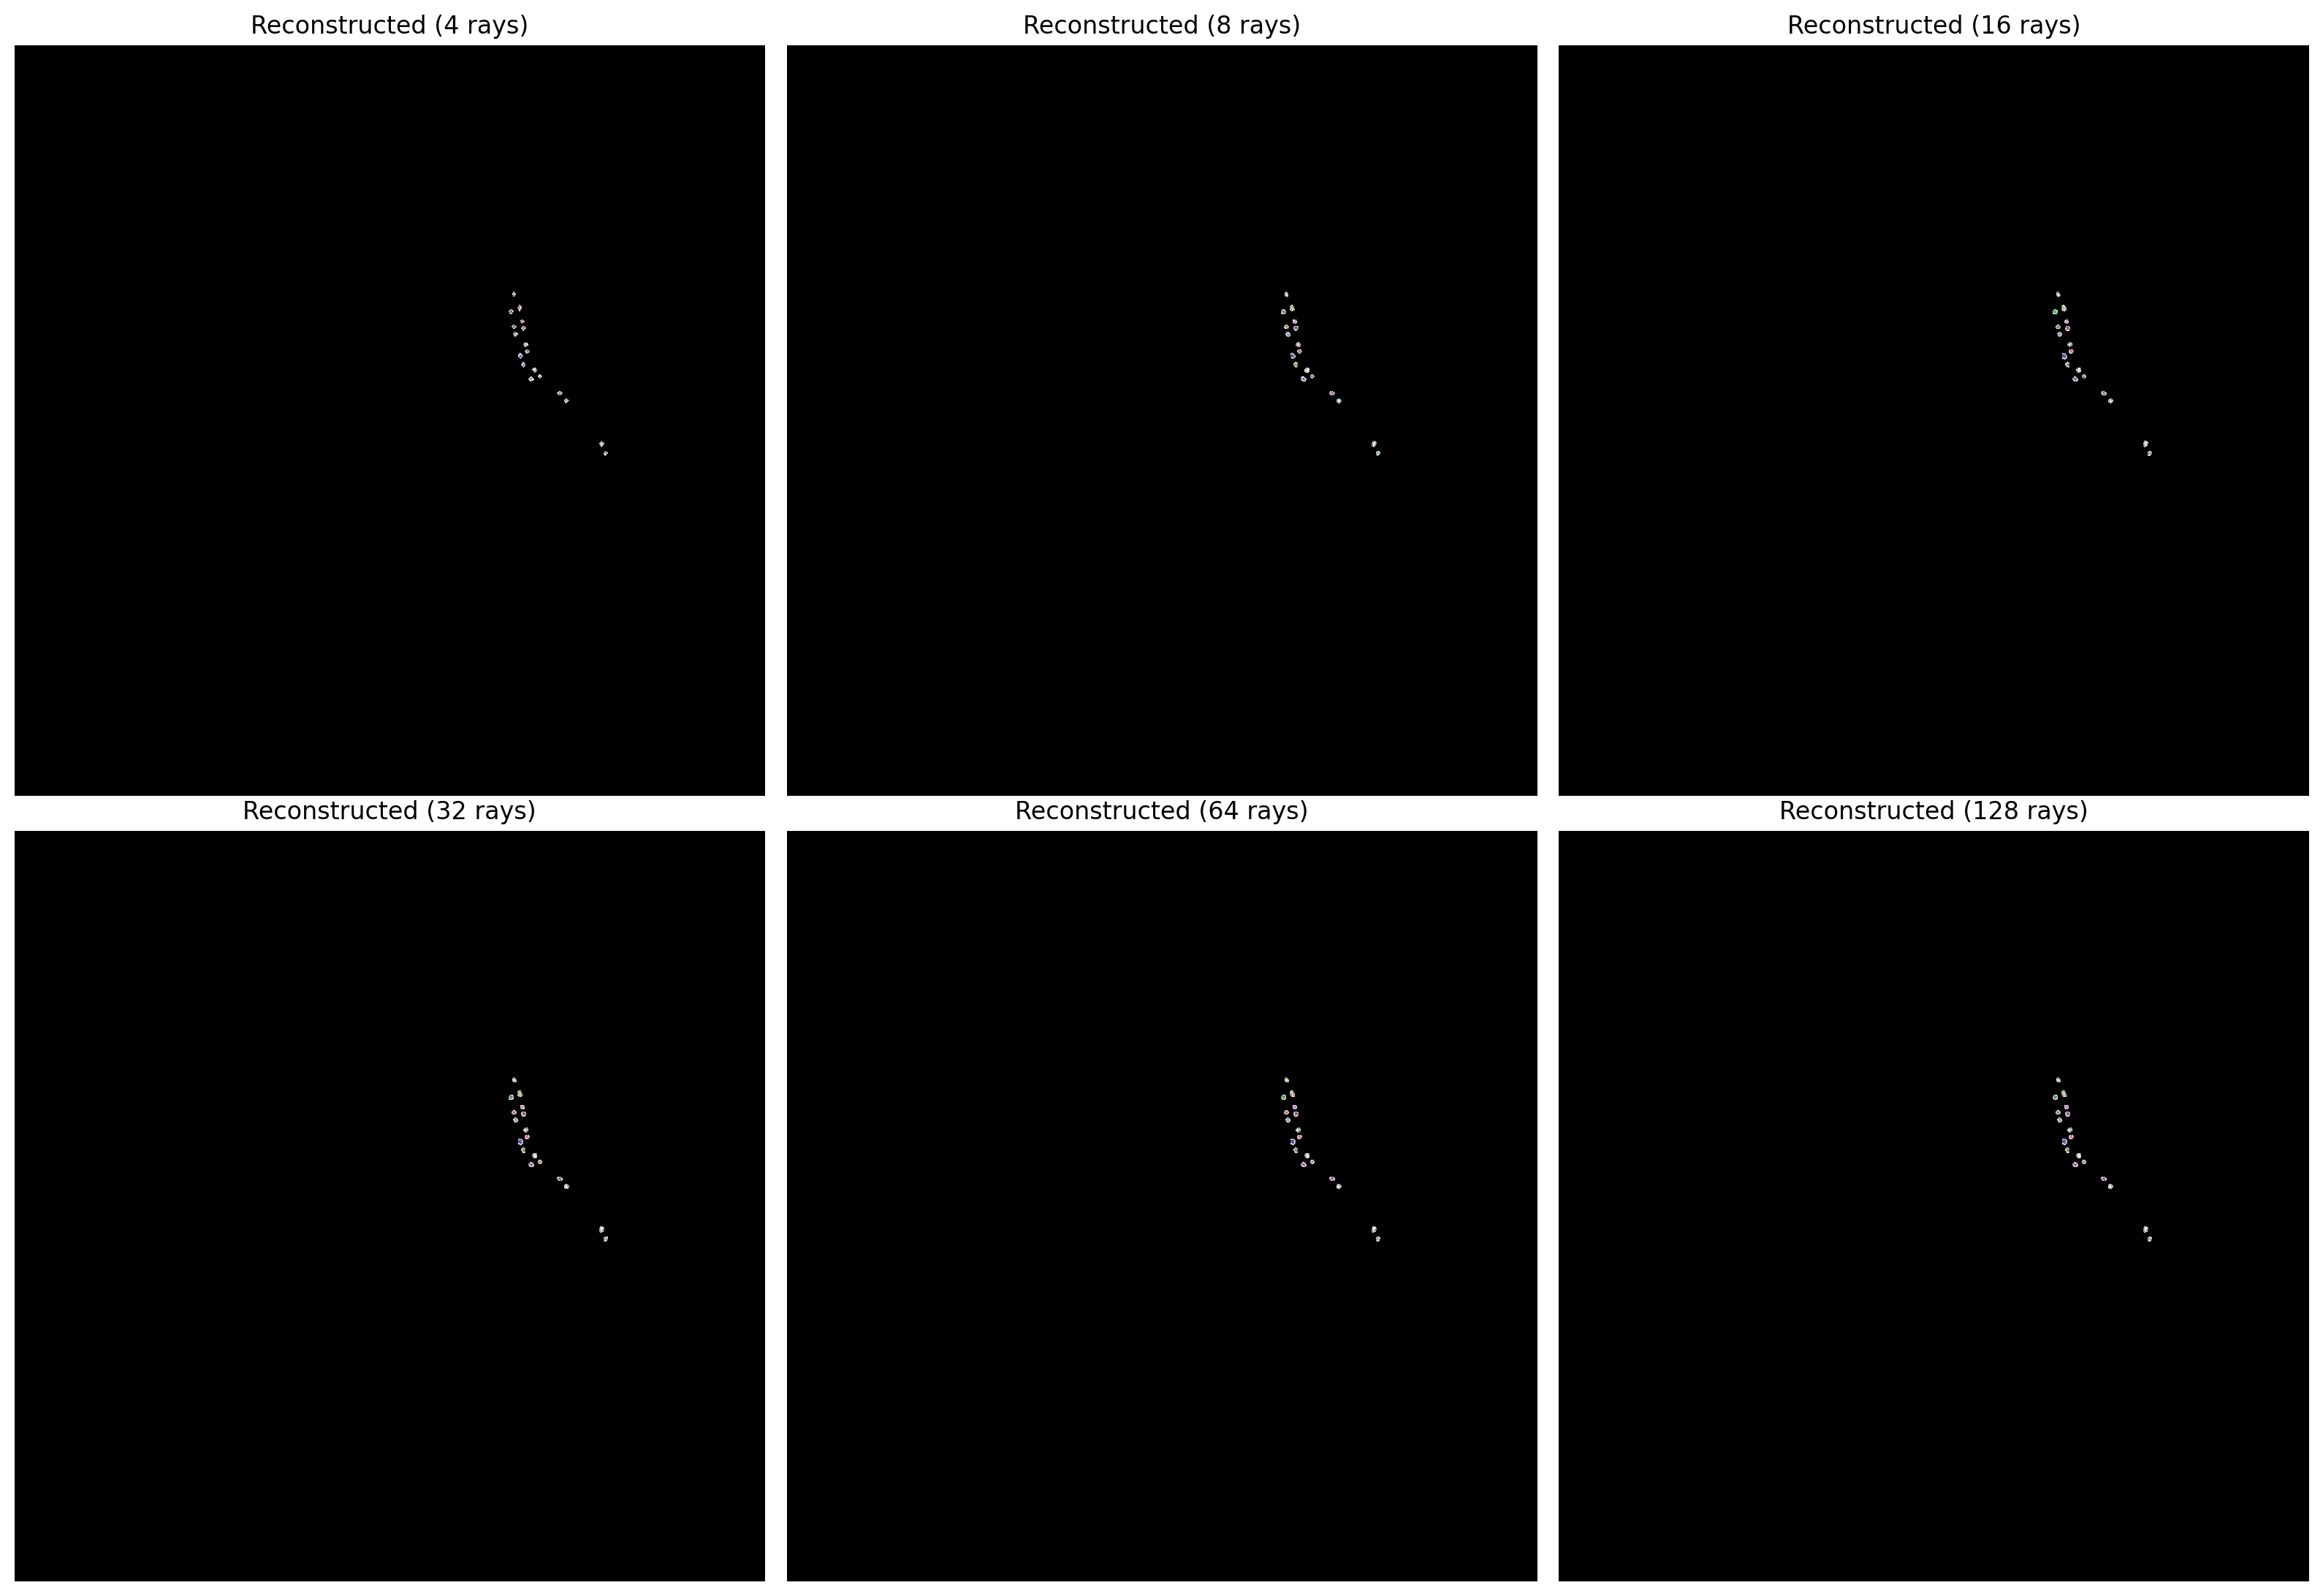

In [21]:
fig, ax = plt.subplots(2,3, figsize=(16,11))
for a,r in zip(ax.flat,n_rays):
    a.imshow(relabel_image_stardist(lbl, n_rays=r), cmap=lbl_cmap)
    a.set_title('Reconstructed (%d rays)' % r)
    a.axis('off')
plt.tight_layout();